In [1]:
# Install the virtualenv package
!pip install virtualenv

# Create a new directory for your environment
!mkdir my_env_abir
# Navigate into the newly created directory
%cd my_env_abir

# Create a virtual environment called 'env'
!virtualenv env_abir

# Activate the virtual environment
!source env_abir/bin/activate


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 17.9 MB/s eta 0:00:00
/content/my_env_abir
created virtual environment CPython3.10.12.final.0-64 in 1121ms
  creator CPython3Posix(dest=/content/my_env_abir/env_abir, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==24.0, setuptools==69.1.0, wheel==0.42.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [2]:
!pip install -r /content/requirements.txt -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.2/806.2 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.4/227.4 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.0/198.0 kB 16.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.1/286.1 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
from base_query import *

In [7]:
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import TokenTextSplitter

loader = PyPDFLoader("/content/mlk.pdf")
raw_documents = loader.load()
# Define chunking strategy
text_splitter = TokenTextSplitter(chunk_size=2048, chunk_overlap=24)

# Only take the first the raw_documents
documents = text_splitter.split_documents(raw_documents[:1])

In [8]:
file_path = "/content/mlk.pdf"   # Open a file dialog and get the path to the selected file

llm = ChatOpenAI(model="gpt-4-turbo-preview", temperature=0)

my_prompting =  f"""# Knowledge Graph Instructions for GPT-4
You will be given a list of fact. Consider every fact from it to construct a knowledge graph based on that.
 Do not repeat nodes and if a person is referred to in different pronouns or manners (he...) consider it only one node.
  Do not be lazy, from each fact I provide and from each word, try to extract meaningful relationships and nodes
  If the facts contain any dates or numbers, extract from them relations and nodes. It's important!
          """

# Read .pdf file
with pdfplumber.open(file_path) as pdf:
    first_page = pdf.pages[0]
    text = first_page.extract_text()
# user_context = "Abir is from Morocco"
user_context = text
my_facts = breakdown_answer(user_context)
nodes, relas = extract_and_store_graph(documents[0],llm, my_prompting, my_facts)

_____________________________________ nodes=[Node(id='8/7/23, 5:15 Am', properties={'name': '8/7/23, 5:15 Am'}), Node(id='Martin Luther King Jr.', properties={'name': 'Martin Luther King Jr.'}), Node(id='Wikipedia', properties={'name': 'Wikipedia'}), Node(id='Michael King Jr.', properties={'name': 'Michael King Jr.'}), Node(id='The Reverend', properties={'name': 'The Reverend'}), Node(id='January 15, 1929', properties={'name': 'January 15, 1929'}), Node(id='April 4, 1968', properties={'name': 'April 4, 1968'}), Node(id='Martin Luther King Sr.', properties={'name': 'Martin Luther King Sr.'}), Node(id='Civil Rights Movement', properties={'name': 'Civil Rights Movement'}), Node(id='1955', properties={'name': '1955'}), Node(id='Nonviolence', properties={'name': 'Nonviolence'}), Node(id='Civil Disobedience', properties={'name': 'Civil Disobedience'}), Node(id='Christian Beliefs', properties={'name': 'Christian Beliefs'}), Node(id='Mahatma Gandhi', properties={'name': 'Mahatma Gandhi'}), Nod

_____________________________________ nodes=[Node(id='8/7/23, 5:15 Am', properties={'name': '8/7/23, 5:15 Am'}), Node(id='Martin Luther King Jr.', properties={'name': 'Martin Luther King Jr.'}), Node(id='Wikipedia', properties={'name': 'Wikipedia'}), Node(id='Michael King Jr.', properties={'name': 'Michael King Jr.'}), Node(id='The Reverend', properties={'name': 'The Reverend'}), Node(id='January 15, 1929', properties={'name': 'January 15, 1929'}), Node(id='April 4, 1968', properties={'name': 'April 4, 1968'}), Node(id='American Baptist', properties={'name': 'American Baptist'}), Node(id='Minister', properties={'name': 'Minister'}), Node(id='Activist', properties={'name': 'Activist'}), Node(id='Civil Rights Movement', properties={'name': 'Civil Rights Movement'}), Node(id='1955', properties={'name': '1955'}), Node(id='Black Church Leader', properties={'name': 'Black Church Leader'}), Node(id='Martin Luther King Sr.', properties={'name': 'Martin Luther King Sr.'}), Node(id='Early Civil 

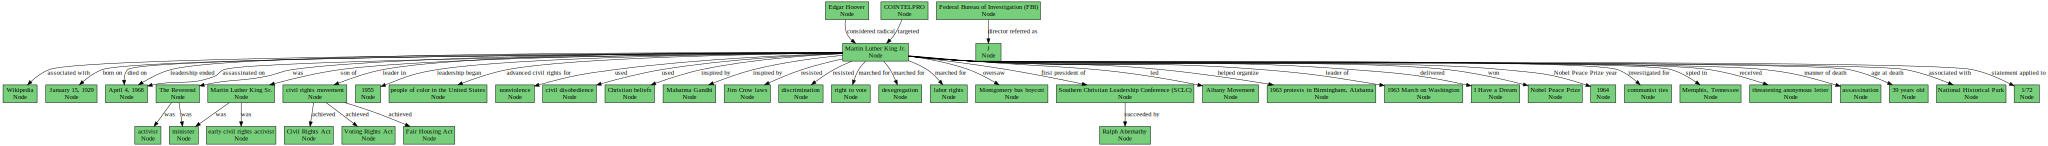

In [9]:
my_graph(documents[0], llm, my_prompting, my_facts)

In [14]:
ask_question_to_KG("Who is the father of Martin Luther King Jr.?")



> Entering new GraphCypherQAChain chain...
Generated Cypher:
MATCH (p:Person {name: "Martin Luther King Jr."})-[:SONOF]->(father:Person) RETURN father.name
Full Context:
[{'father.name': 'Martin Luther King Sr.'}]

> Finished chain.


'Martin Luther King Sr. is the father of Martin Luther King Jr.'